------------------------------------------------------------


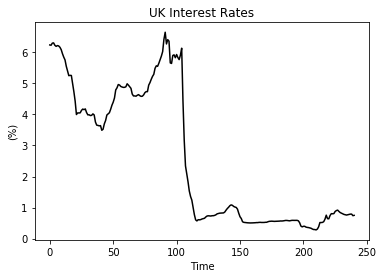

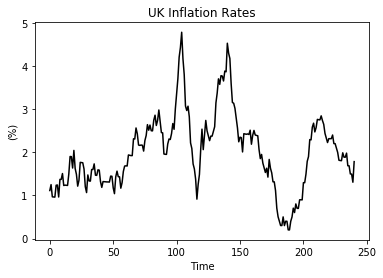

------------------------------------------------------------


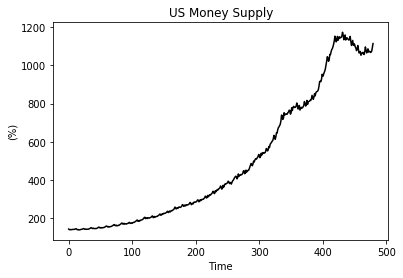

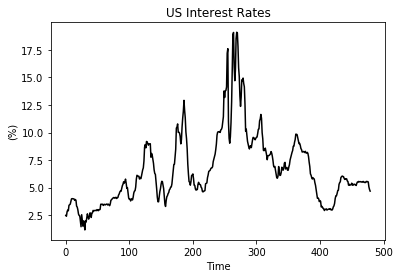

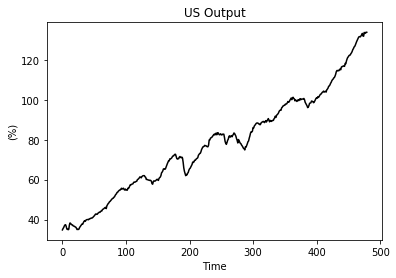

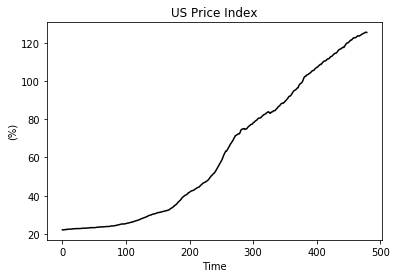

                            OLS Regression Results                            
Dep. Variable:                  irate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.008673
Date:                Wed, 17 Mar 2021   Prob (F-statistic):              0.926
Time:                        14:07:41   Log-Likelihood:                -533.06
No. Observations:                 241   AIC:                             1070.
Df Residuals:                     239   BIC:                             1077.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6215      0.358      7.316      0.0

MissingDataError: exog contains inf or nans

In [5]:
# Code to replicate the routines in Lecture 9
# For the methods in this code to work, you need to install the package 'arch'
# for anacaonda users use: conda install arch-py -c conda-forge

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf 

# Use data file: fisher.xls 
# We attempt to estimate a Fisher Equation, which relates inflation and interest in the long run.
# The data cover the UK case.

data=pd.read_excel('D:/ACADEMIC/TEACHING/2021/University of Westminster/Predictive Analysis/PythonCodes/fisher.xls')
data1=pd.read_excel('D:/ACADEMIC/TEACHING/2021/University of Westminster/Predictive Analysis/PythonCodes/sims_data.xlsx')



# Plotting the data
print ("------------------------------------------------------------")
plt.figure(1)
plt.plot(data['irate'], color='black') 
plt.xlabel('Time')
plt.ylabel('(%)')
plt.title('UK Interest Rates')
plt.grid(False) # I have added this for me to be able to accurately see the graph
plt.show()

plt.figure(1)
plt.plot(data['iflate'], color='black') 
plt.xlabel('Time')
plt.ylabel('(%)')
plt.title('UK Inflation Rates')
plt.grid(False) # I have added this for me to be able to accurately see the graph
plt.show()

# Plotting the data
print ("------------------------------------------------------------")
plt.figure(1)
plt.plot(data1['mt'], color='black') 
plt.xlabel('Time')
plt.ylabel('(%)')
plt.title('US Money Supply')
plt.grid(False) # I have added this for me to be able to accurately see the graph
plt.show()

plt.figure(1)
plt.plot(data1['rt'], color='black') 
plt.xlabel('Time')
plt.ylabel('(%)')
plt.title('US Interest Rates')
plt.grid(False) # I have added this for me to be able to accurately see the graph
plt.show()


plt.figure(1)
plt.plot(data1['ot'], color='black') 
plt.xlabel('Time')
plt.ylabel('(%)')
plt.title('US Output')
plt.grid(False) # I have added this for me to be able to accurately see the graph
plt.show()

plt.figure(1)
plt.plot(data1['pt'], color='black') 
plt.xlabel('Time')
plt.ylabel('(%)')
plt.title('US Price Index')
plt.grid(False) # I have added this for me to be able to accurately see the graph
plt.show()

# Linear Regression

formula='irate~ iflate'  
model=smf.ols(formula, data).fit()  # the OLS library, we called the output 'results'
print(model.summary())

formula1='ot~rt+ mt+pt'
model1=smf.ols(formula1, data1).fit()  # the OLS library, we called the output 'results'
print(model1.summary())


# Testing for the presence of unit root using ADF test

from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

# test levels
ot_test=ADF(data1['ot'], lags=10)
print(ot_test.summary())

# Testing the first difference of the ot
import numpy as np
def LogDiff(x):
        x_diff=100*np.log(x/x.shift(1))  # note here: you do not need to multiply by 100
        return x_diff

# generating the fist difference of prices

data1['dot']=LogDiff(data1['ot'])
dot_test=ADF(data1['dot'], lags=10)
print(dot_test.summary())

